In [37]:
#stl
import os
import warnings

#data handling
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

#stats
import scipy
import sklearn

#network
import networkx as nx

#vis
import matplotlib.pyplot as plt
import seaborn as sns

#torch



In [3]:
!ls ..

 1.data_preprocess.py			       install_requirements
'2. MobileNet-v2 Backbone Training.ipynb'      LICENSE
'2. ShuffleNetv2 Backbone Training.ipynb'      mobilenet_backbone_weights
'2. ViT-S-16 Backbone Training.ipynb'	       README.md
'3. Generate Embeddings From Backbone.ipynb'   requirements.txt
 backbone_embeddings			       shufflenet_backbone_weights
 data					       torch_requirements.txt
 DEPRECATED_requirements.txt		       ViTS16_backbone_weights
 EDA


In [8]:
mobilenet_embeddings_path = "../backbone_embeddings/mobilenet_embeddings_FOLD0.csv"
vit_embeddings_path = "../backbone_embeddings/ViT_embeddings_FOLD0.csv"

In [53]:
mobilenet_embeddings_df = pd.read_csv(mobilenet_embeddings_path, header = None)
vit_embeddings_df = pd.read_csv(vit_embeddings_path, header = None)

In [54]:
vit_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,21.0,147_,0,0.009337,-0.102678,-0.275613,-0.440035,0.150540,0.559416,0.234741,...,-0.014285,-0.252738,0.052190,-0.368329,-0.247997,0.167237,0.106442,-0.557941,0.113893,-0.517393
1,5.0,190_,1,-0.304579,-0.319563,-0.323816,-0.910463,-0.247550,0.408769,-0.124648,...,0.027400,-0.416930,0.443979,-0.336507,0.143022,-0.498619,0.495363,0.461676,-0.647054,-0.595526
2,17.0,191_,0,0.025306,-0.000447,-0.149466,-0.586288,-0.206528,0.516382,-0.161351,...,-0.083352,-0.139403,0.374046,-0.381281,0.271047,-0.610034,0.391112,-0.057924,-0.199395,-0.502559
3,21.0,101_,0,-0.281770,-0.323360,-0.221492,-0.366808,0.041677,0.008139,-0.273895,...,-0.095018,-0.093977,0.423944,0.169541,-0.127539,-0.435240,1.116510,0.294157,-0.045357,-0.389839
4,87.0,50_,0,-0.287854,-0.469084,-0.040957,-0.351877,-0.242712,0.115523,-0.368210,...,-0.302479,0.061513,0.437828,-0.679161,-0.376398,-0.476167,0.317963,0.579923,-0.036434,-0.365642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,43.0,12_,0,0.052649,-0.285518,-0.075708,-0.612010,-0.491191,0.135838,0.785334,...,0.062718,-0.058036,0.545017,-0.025291,0.019858,0.064222,0.970716,0.191242,0.071524,-0.474144
1129,73.0,22_,1,0.087861,0.100818,-0.306021,-1.054576,-0.312677,0.102561,0.118178,...,-0.032393,-0.300512,0.481882,0.027846,0.074239,-0.514756,0.412950,0.710888,0.009207,-0.529572
1130,36.0,18_,0,0.088208,0.177246,-0.209313,-0.476540,0.083332,0.209852,0.181796,...,0.153508,-0.248259,0.211577,-0.541652,0.407286,-0.758825,0.500726,0.218769,-0.240764,-0.689971
1131,92.0,206_,0,0.614405,-0.424561,-0.708978,-0.407725,0.337254,-0.135684,0.890849,...,-0.040484,-0.010411,0.158845,0.481335,-0.227072,-0.049888,1.380984,0.620579,-0.069815,-0.861517


In [55]:
vit_embeddings = vit_embeddings_df.iloc[:,3:]
vit_embeddings = vit_embeddings.to_numpy()
vit_embeddings

array([[ 9.33708996e-03, -1.02678359e-01, -2.75613219e-01, ...,
        -5.57940781e-01,  1.13892600e-01, -5.17392993e-01],
       [-3.04578960e-01, -3.19563329e-01, -3.23816121e-01, ...,
         4.61675942e-01, -6.47053838e-01, -5.95525861e-01],
       [ 2.53063906e-02, -4.46669757e-04, -1.49466321e-01, ...,
        -5.79238385e-02, -1.99394971e-01, -5.02558887e-01],
       ...,
       [ 8.82081091e-02,  1.77246124e-01, -2.09313124e-01, ...,
         2.18769208e-01, -2.40763605e-01, -6.89970851e-01],
       [ 6.14405036e-01, -4.24561203e-01, -7.08977759e-01, ...,
         6.20578766e-01, -6.98145628e-02, -8.61517310e-01],
       [-7.40657747e-01, -3.84347066e-02,  1.79055393e-01, ...,
        -1.73308849e-01, -1.95764318e-01, -7.61273623e-01]])

In [21]:
from sklearn.manifold import TSNE

In [56]:
tsne = TSNE(n_components=2, n_iter=500)
tsne_results = tsne.fit_transform(vit_embeddings)

In [59]:
tsne_df = pd.DataFrame()
tsne_df["tsne_x"] = [x[0] for x in list(tsne_results)]
tsne_df["tsne_y"] = [x[1] for x in list(tsne_results)]
tsne_df["label"] = vit_embeddings_df.iloc[:,2]
tsne_df["label"].value_counts()

label
0    1004
1     129
Name: count, dtype: int64

In [60]:
tsne_df

,tsne_x,tsne_y,label
0,-21.078388,-6.371456,0
1,16.919544,-7.716949,1
2,-21.485363,-10.170166,0
3,20.766611,34.466862,0
4,-25.967293,1.353273,0
...,...,...,...
1128,21.443041,18.390228,0
1129,20.993855,-17.895985,1
1130,10.045152,1.708581,0
1131,41.451393,8.319964,0


Text(0, 0.5, 'tSNE y')

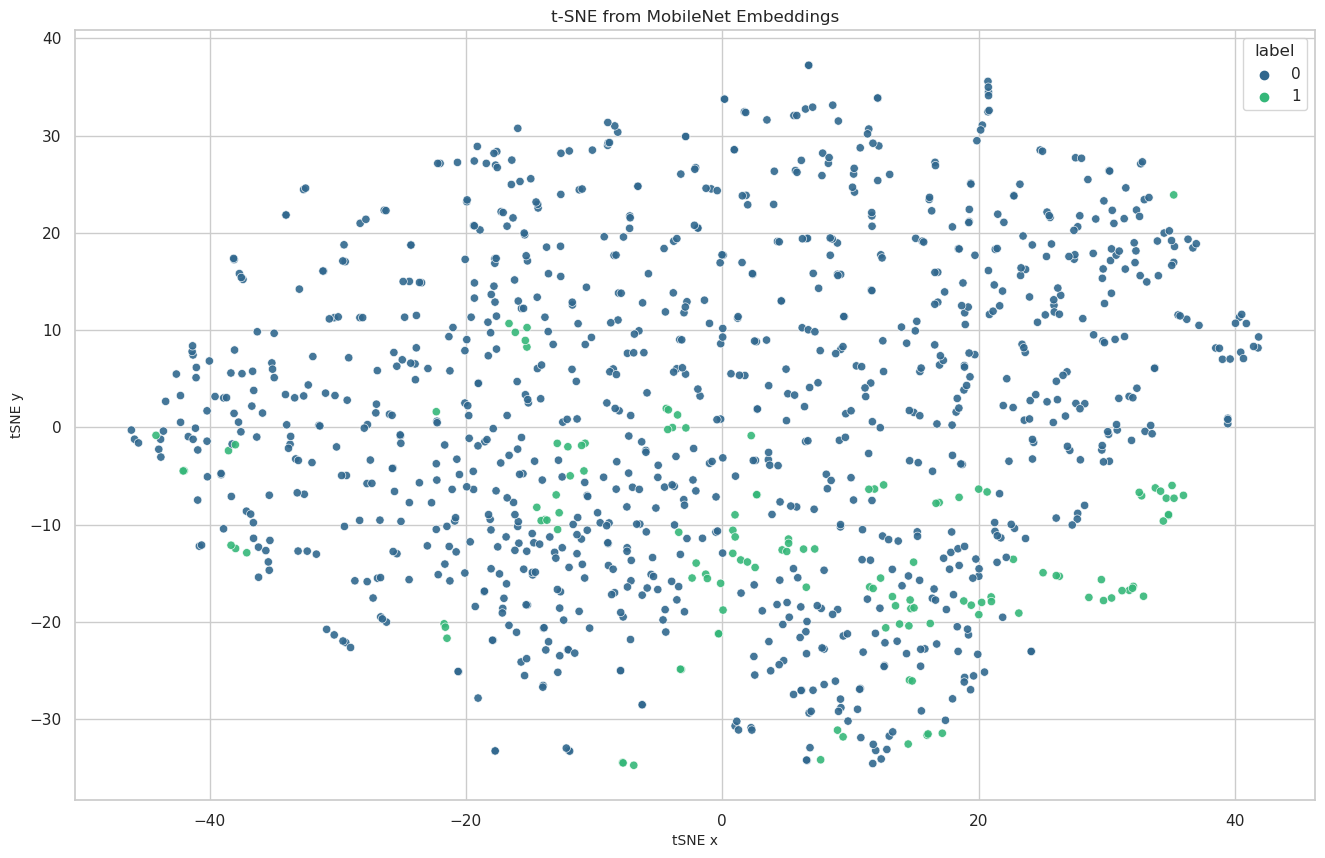

In [61]:
sns.set(font_scale = 1)
sns.set_style("whitegrid")

plt.figure(figsize=(16,10))
plt.title("t-SNE from MobileNet Embeddings")
g = sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="label",
    data = tsne_df,
    palette="viridis",
    legend="full",
    alpha=0.9
)
g.set_xlabel("tSNE x",fontsize=10)
g.set_ylabel("tSNE y",fontsize=10)